In [1]:
#Preprocessing functions:


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.2 MB/s eta 0:00:00


In [4]:
import cv2

In [5]:
#Loading Dataset:
!pip install -q kaggle


In [6]:
%mkdir dataset
%mkdir dataset/images # for source images
%mkdir dataset/masks # for annotation masks
%mkdir dataset/test # for test images
%mkdir dataset/temp # temp storage


In [7]:
# start the download
!kaggle datasets download 'nikhilpandey360/chest-xray-masks-and-labels'

Dataset URL: https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels
License(s): CC0-1.0
100% 9.57G/9.58G [09:30<00:00, 19.4MB/s]
100% 9.58G/9.58G [09:30<00:00, 18.0MB/s]


In [8]:
!unzip chest-xray-masks-and-labels.zip -d dataset/temp/


Archive:  chest-xray-masks-and-labels.zip
  inflating: dataset/temp/Lung Segmentation/.ipynb_checkpoints/Montgomery-checkpoint.ipynb  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0001_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0002_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0003_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0004_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0005_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0006_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0007_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0008_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0009_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0010_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0011_0.png  
  inflating: dataset/temp/Lung Segmentation/CXR_png/CHNCXR_0012_0.png  
 

In [9]:
%ls dataset/temp/Lung\ Segmentation

ClinicalReadings/  masks/                       NLM-MontgomeryCXRSet-ReadMe.pdf
CXR_png/           NLM-ChinaCXRSet-ReadMe.docx  test/


In [10]:
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/images/
IMAGE_PATH = "/content/dataset/images/"


In [11]:
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/masks/
MASK_PATH = '/content/dataset/masks/'
%mv dataset/temp/Lung\ Segmentation/CXR_png/* dataset/test/
TEST_PATH = '/content/dataset/test/'

mv: cannot stat 'dataset/temp/Lung Segmentation/CXR_png/*': No such file or directory
mv: cannot stat 'dataset/temp/Lung Segmentation/CXR_png/*': No such file or directory


In [12]:
%mkdir /content/transformed_images

In [13]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Assuming fb2DEWT and related functions are already defined in your notebook
# Load 50 images from your dataset (e.g., stored in dataset/images)
image_dir = '/content/dataset/images'  # Path to your images folder
output_dir = '/content/dataset/transformed_images'  # Where to save the transformed components
os.makedirs(output_dir, exist_ok=True)

num=40

image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])[:num]

In [14]:
%mv dataset/temp/Lung\ Segmentation/masks/* dataset/masks/
MASK_PATH = '/content/dataset/masks/'

In [15]:
MASK_PATH = '/content/dataset/masks/'
TEST_PATH = '/content/dataset/test/'

In [16]:
# importing os module
import os

# suffix cropping function
def rchop(s, suffix):
    if suffix and s.endswith(suffix):
        return s[:-len(suffix)]
    return s

suffix = "_mask.png"

# iterate over all mask images and edit the file-names
for count, filename in enumerate(os.listdir("/content/dataset/masks")):
  src = "/content/dataset/masks/" + filename
  res = rchop(src, suffix)
  dst = ""
  if src != res:
    dst = rchop(src, suffix) + ".png"
    os.rename(src, dst)

In [17]:
# check the number of files in the images/ and masks/ directories
import os.path

print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))


number of files in images/ directory: 800
number of files in masks/ directory: 704


In [18]:
# function to confirm the existence of a file in a given directory
def searchFile(fileName, TARGET_PATH):
  for root, dirs, files in os.walk(TARGET_PATH):
    for Files in files:
      #print(Files)
      found = Files.find(fileName)
      if found != -1:
        break
  return found

In [19]:
%mkdir /content/dataset/orphan_images

In [20]:
# clean up the images/ directory by removing all images that do not have a mask
import shutil

cnt = 0

for count, filename in enumerate(os.listdir("/content/dataset/images")):
  found = searchFile(filename, MASK_PATH)
  if found == -1:
    cnt = cnt + 1
    src = "/content/dataset/images/" + filename
    dst = "/content/dataset/orphan_images/" + filename
    dest = shutil.move(src, dst)
print("number of files not matched: " + str(cnt))

number of files not matched: 96


In [21]:
# confirm consistency
print("number of files in images/ directory: " + str(len([name for name in os.listdir("/content/dataset/images/")])))
print("number of files in masks/ directory: " + str(len([name for name in os.listdir("/content/dataset/masks/")])))

number of files in images/ directory: 704
number of files in masks/ directory: 704


In [22]:
# Load the image (for example)
image = cv2.imread("/content/dataset/images/CHNCXR_0001_0.png")


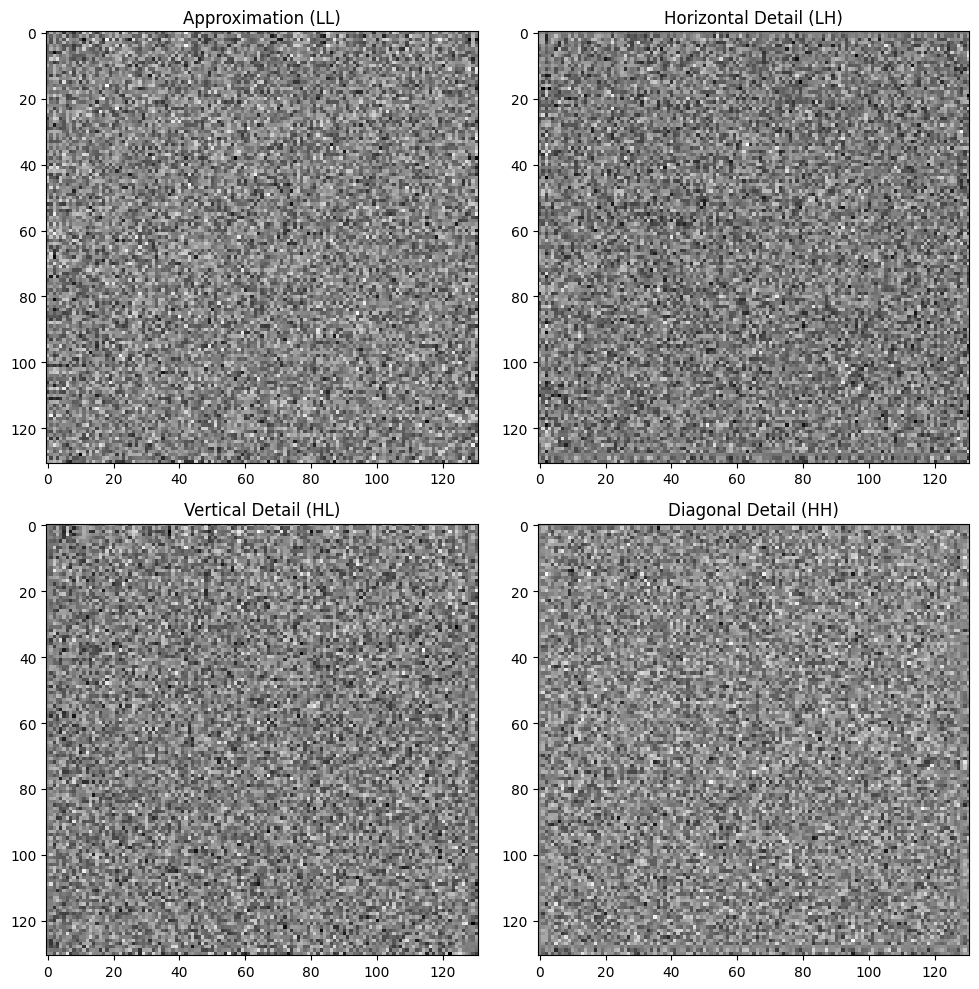

In [23]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample 2D array (image-like) for demonstration
data = np.random.rand(256, 256)

# Perform 2D Discrete Wavelet Transform using the Daubechies 4 (db4) wavelet
coeffs2 = pywt.dwt2(data, 'db4')

# The result of dwt2 is a tuple containing (LL, (LH, HL, HH))
LL, (LH, HL, HH) = coeffs2

# Plot the original and transformed coefficients
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')

plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal Detail (LH)')

plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical Detail (HL)')

plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal Detail (HH)')

plt.tight_layout()
plt.show()

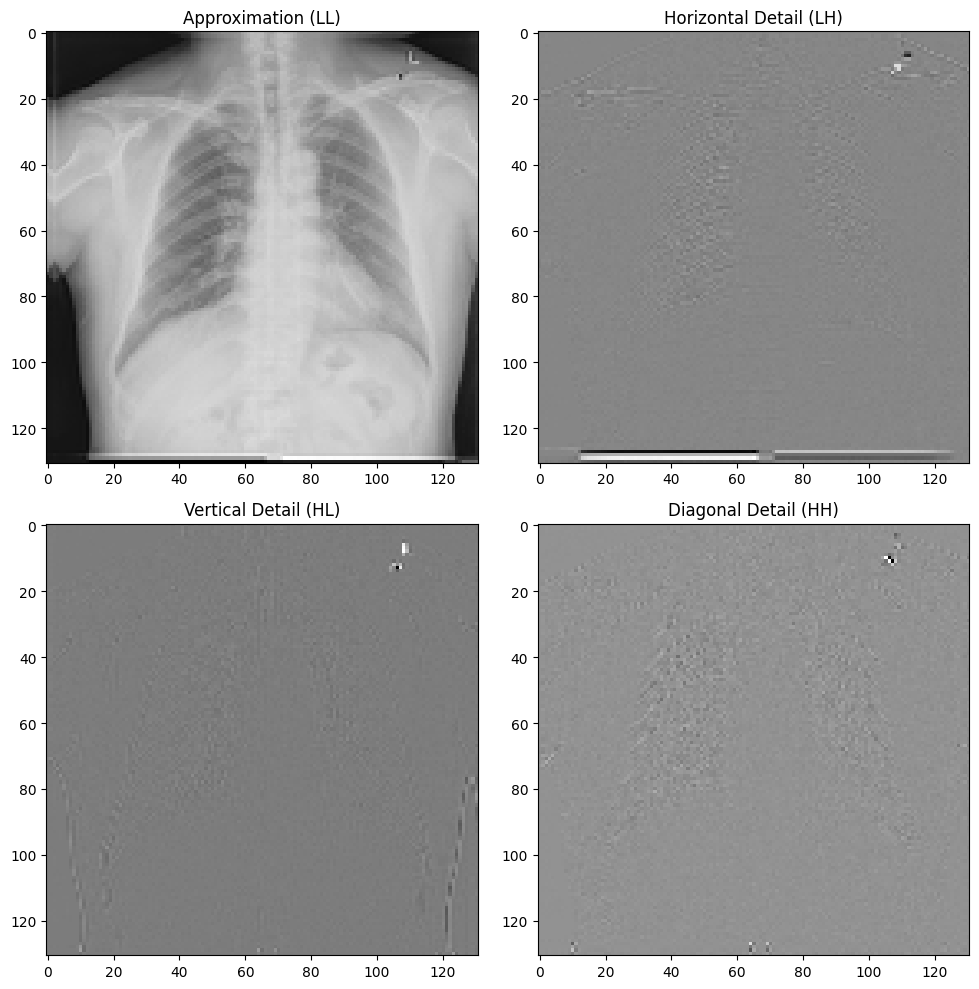

In [26]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Function to load and preprocess image
def load_image(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize image to 256x256 (if needed)
    img = cv2.resize(img, (256, 256))

    # Normalize the image data (optional but helps with numerical stability)
    img = img / 255.0

    return img

# Function to perform 2D wavelet transform and plot components
def perform_wavelet_transform(image):
    # Perform 2D Discrete Wavelet Transform using the Daubechies 4 (db4) wavelet
    coeffs2 = pywt.dwt2(image, 'db4')

    # The result of dwt2 is a tuple containing (LL, (LH, HL, HH))
    LL, (LH, HL, HH) = coeffs2

    # Plot the original and transformed coefficients
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(LL, cmap='gray')
    plt.title('Approximation (LL)')

    plt.subplot(2, 2, 2)
    plt.imshow(LH, cmap='gray')
    plt.title('Horizontal Detail (LH)')

    plt.subplot(2, 2, 3)
    plt.imshow(HL, cmap='gray')
    plt.title('Vertical Detail (HL)')

    plt.subplot(2, 2, 4)
    plt.imshow(HH, cmap='gray')
    plt.title('Diagonal Detail (HH)')

    plt.tight_layout()
    plt.show()

# TEst images in our dataset
image_path = '/content/dataset/images/CHNCXR_0001_0.png'

# Load the image
image = load_image(image_path)

# Perform wavelet transform and plot the components
perform_wavelet_transform(image)


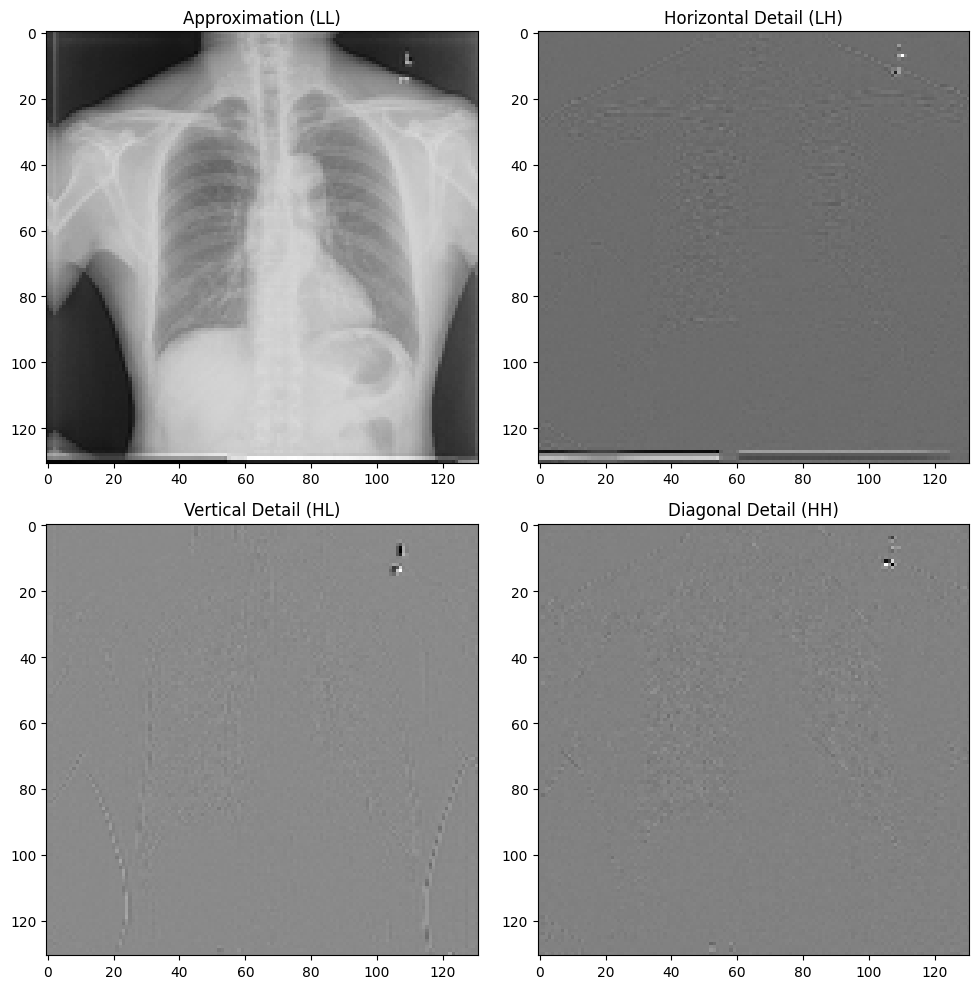

In [29]:
# TEst images in our dataset
image_path = '/content/dataset/images/CHNCXR_0004_0.png'

# Load the image
image = load_image(image_path)

# Perform wavelet transform and plot the components
perform_wavelet_transform(image)

**Data Generator:**

In [35]:
import os
import numpy as np
import pywt
import cv2
import tensorflow as tf

# Custom Data Generator class
class WaveletDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, image_folder, mask_folder, batch_size, image_size=(256, 256), wavelet='db4'):
        self.image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder)]
        self.mask_paths = [os.path.join(mask_folder, fname) for fname in os.listdir(mask_folder)]
        self.batch_size = batch_size
        self.image_size = image_size
        self.wavelet = wavelet

    def __len__(self):
        return int(np.floor(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        # Generate batch indexes
        batch_image_paths = self.image_paths[index * self.batch_size:(index + 1) * self.batch_size]
        batch_mask_paths = self.mask_paths[index * self.batch_size:(index + 1) * self.batch_size]

        # Initialize arrays for the batch
        images = np.zeros((self.batch_size, self.image_size[0], self.image_size[1], 4))  # 4 channels for LL, LH, HL, HH
        masks = np.zeros((self.batch_size, self.image_size[0], self.image_size[1], 1))   # Single-channel mask

        for i, (img_path, mask_path) in enumerate(zip(batch_image_paths, batch_mask_paths)):
            # Load image and mask
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                raise ValueError(f"Error loading image from {img_path}")
            img = cv2.resize(img, self.image_size) / 255.0  # Normalize image

            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                raise ValueError(f"Error loading mask from {mask_path}")
            mask = cv2.resize(mask, self.image_size) / 255.0  # Normalize mask
            mask = np.expand_dims(mask, axis=-1)  # Add channel dimension for mask

            # Perform wavelet transformation
            coeffs2 = pywt.dwt2(img, self.wavelet)
            LL, (LH, HL, HH) = coeffs2

            # Stack the components into a 4-channel image and resize to the original size
            wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)  # Shape: smaller than (256, 256, 4)
            wavelet_image = cv2.resize(wavelet_image, self.image_size)  # Resize to (256, 256, 4)

            # Add to batch
            images[i] = wavelet_image
            masks[i] = mask

        return images, masks

# Example usage:
image_folder = IMAGE_PATH  # Replace with actual folder path
mask_folder = MASK_PATH    # Replace with actual folder path
batch_size = 4

data_gen = WaveletDataGenerator(image_folder, mask_folder, batch_size)

# Get a sample batch
sample_images, sample_masks = data_gen[0]

print("Batch shape (images):", sample_images.shape)  # Should be (batch_size, 256, 256, 4)
print("Batch shape (masks):", sample_masks.shape)    # Should be (batch_size, 256, 256, 1)

Batch shape (images): (4, 256, 256, 4)
Batch shape (masks): (4, 256, 256, 1)


Test Data generator:

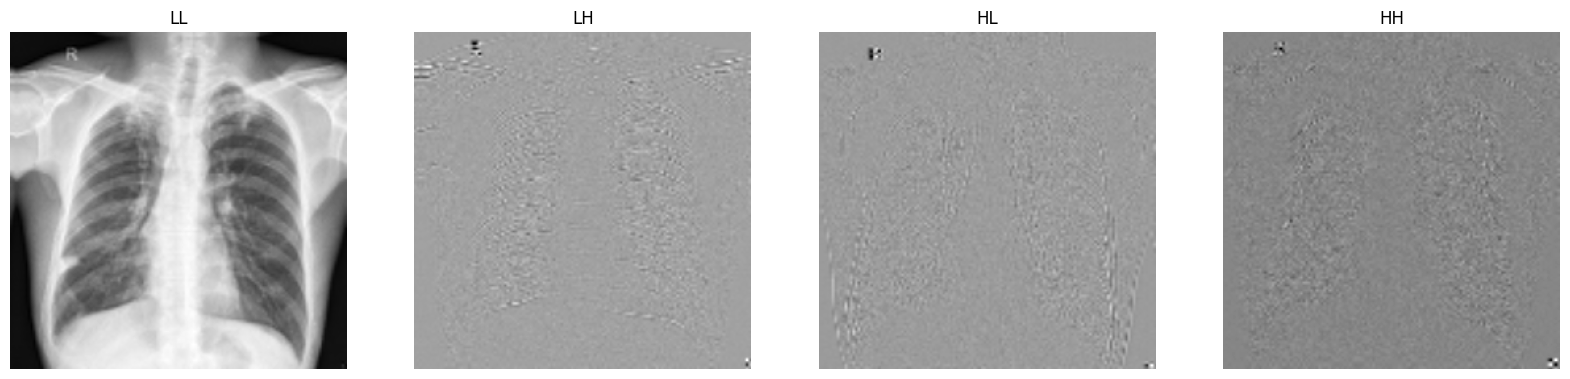

In [36]:
import matplotlib.pyplot as plt

# Get a sample batch
sample_images, _ = data_gen[0]

# Plot first image's wavelet components (LL, LH, HL, HH)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
titles = ['LL', 'LH', 'HL', 'HH']

for i in range(4):
    axes[i].imshow(sample_images[0, :, :, i], cmap='gray')
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.show()


**UNET MODEL:**

In [37]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(input_tensor, num_filters):
    x = conv_block(input_tensor, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input_tensor, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input_tensor)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model

# Modify input shape to (256, 256, 4) for wavelet-transformed images
model = build_unet((256, 256, 4))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
# Print the model summary to confirm the architecture
model.summary()


Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 4)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          2,368 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 256, 256, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 256, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 256, 256, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 128, 128)  │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 128, 128, 128)  │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128, 128, 128)  │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 128, 128, 128)  │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 31,055,873 (118.47 MB)

 Trainable params: 31,044,097 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

**TRAINING THE MODEL:**

In [39]:
# Create the data generators
batch_size = 4
train_data_gen = WaveletDataGenerator(IMAGE_PATH, MASK_PATH, batch_size)

# Train the model
num_epochs = 7  # Set to 7 epochs
history = model.fit(
    train_data_gen,
    epochs=num_epochs,
    steps_per_epoch=len(train_data_gen)
)

# Save the model after training
model.save("modified_unet_model.h5")

# Save the model after training
model.save("modified_unet_model.h5")


Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


176/176 ━━━━━━━━━━━━━━━━━━━━ 191s 741ms/step - accuracy: 0.9215 - loss: 0.2033
Epoch 2/7
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/7


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


176/176 ━━━━━━━━━━━━━━━━━━━━ 154s 717ms/step - accuracy: 0.9764 - loss: 0.0684
Epoch 4/7
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 86us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/7
176/176 ━━━━━━━━━━━━━━━━━━━━ 131s 717ms/step - accuracy: 0.9789 - loss: 0.0597
Epoch 6/7
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/7
176/176 ━━━━━━━━━━━━━━━━━━━━ 130s 708ms/step - accuracy: 0.9796 - loss: 0.0570


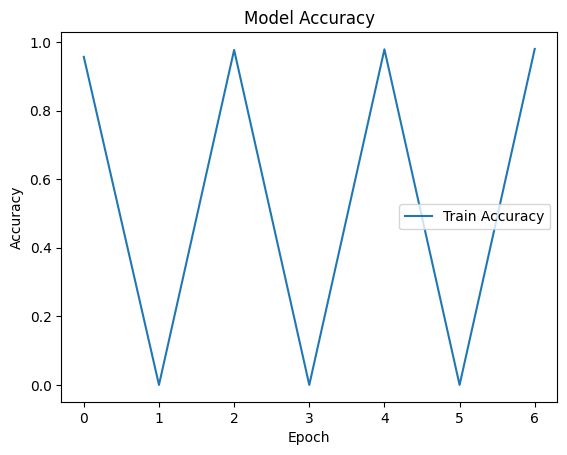

In [40]:
# Train the model for 7 epochs without validation


# Plotting training accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Testing on Sample Image

In [58]:
image_path = '/content/dataset/images/CHNCXR_0001_0.png'  # Replace with your actual image path

Preprocessed image shape: (1, 256, 256, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


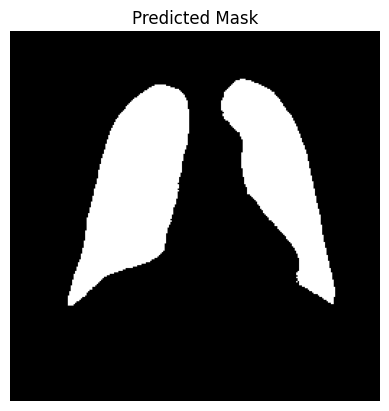

In [59]:
import numpy as np
import cv2
import os
import pywt
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, wavelet='db4', image_size=(256, 256)):
    if not os.path.exists(image_path):
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image could not be loaded: {image_path}")

    img_resized = cv2.resize(img, image_size) / 255.0

    # Perform wavelet transformation
    coeffs2 = pywt.dwt2(img_resized, wavelet)

    if coeffs2 is None or len(coeffs2) != 2:
        raise ValueError("Wavelet transformation failed to produce coefficients.")

    LL, (LH, HL, HH) = coeffs2

    # Resize wavelet components to match the original image size
    LL = cv2.resize(LL, image_size)
    LH = cv2.resize(LH, image_size)
    HL = cv2.resize(HL, image_size)
    HH = cv2.resize(HH, image_size)

    # Stack the components into a 4-channel image
    wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)

    return wavelet_image

preprocessed_image = load_and_preprocess_image(image_path)

# Add a batch dimension
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

print(f"Preprocessed image shape: {preprocessed_image.shape}")

# Make prediction
predicted_mask = model.predict(preprocessed_image)

# Threshold the predicted mask to get binary output (if needed)
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)

# Display the predicted mask
plt.imshow(predicted_mask_binary[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title('Predicted Mask')
plt.show()

Preprocessed image shape: (1, 256, 256, 4)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


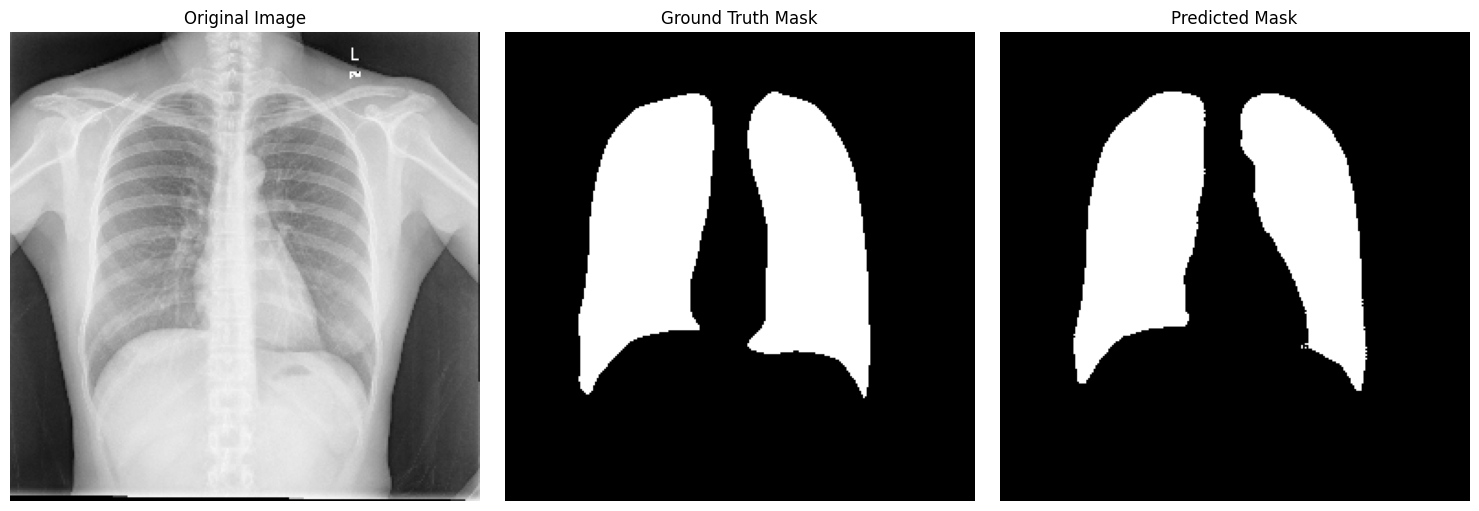

Accuracy: 0.9656
F1 Score: 0.9234


In [65]:
import numpy as np
import cv2
import os
import pywt
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, wavelet='db4', image_size=(256, 256)):
    if not os.path.exists(image_path):
        raise ValueError(f"Image not found: {image_path}")

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image could not be loaded: {image_path}")

    img_resized = cv2.resize(img, image_size) / 255.0

    coeffs2 = pywt.dwt2(img_resized, wavelet)

    if coeffs2 is None or len(coeffs2) != 2:
        raise ValueError("Wavelet transformation failed to produce coefficients.")

    LL, (LH, HL, HH) = coeffs2

    LL = cv2.resize(LL, image_size)
    LH = cv2.resize(LH, image_size)
    HL = cv2.resize(HL, image_size)
    HH = cv2.resize(HH, image_size)

    wavelet_image = np.stack([LL, LH, HL, HH], axis=-1)

    return img_resized, wavelet_image


# Load and preprocess the image
image_path = "/content/dataset/images/CHNCXR_0003_0.png"  # Replace with your actual image path
mask_path = "/content/dataset/masks/CHNCXR_0003_0.png" # Replace with your actual mask path



def load_ground_truth_mask(mask_path, image_size=(256, 256)):
    if not os.path.exists(mask_path):
        raise ValueError(f"Ground truth mask not found: {mask_path}")

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        raise ValueError(f"Ground truth mask could not be loaded: {mask_path}")

    mask_resized = cv2.resize(mask, image_size)
    # Ensure the mask is binary
    mask_binary = (mask_resized > 127).astype(np.uint8)
    return mask_binary

original_image, preprocessed_image = load_and_preprocess_image(image_path)
ground_truth_mask = load_ground_truth_mask(mask_path)

# Add a batch dimension for model prediction
preprocessed_image_batch = np.expand_dims(preprocessed_image, axis=0)

print(f"Preprocessed image shape: {preprocessed_image_batch.shape}")

# Make prediction
predicted_mask = model.predict(preprocessed_image_batch)

# Ensure the predicted mask is binary
predicted_mask_binary = (predicted_mask > 0.5).astype(np.uint8)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(ground_truth_mask, cmap='gray')
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

axes[2].imshow(predicted_mask_binary[0, :, :, 0], cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Calculate and print metrics
predicted_flat = predicted_mask_binary[0, :, :, 0].flatten()
ground_truth_flat = ground_truth_mask.flatten()

accuracy = accuracy_score(ground_truth_flat, predicted_flat)
f1 = f1_score(ground_truth_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")